# Water Quality Prediction

## ML Model training 

**Since it is a classification problem, we use Machine Learning classifiers.**

- Logistic Regression
- KNN Classifier
- Naive Bayes Classifier
- Decision Tree Classifier
- SVM(Support Vector Machine) SVC
- RandomForestClassifier
- Keras.Sequential

In [274]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [275]:
import warnings
warnings.filterwarnings('ignore')

## Training the list of models through iteration

In [276]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [277]:
#for metrics
from sklearn import metrics

In [278]:
#reading the final data
data_frame=pd.read_csv('final_input_data_water_quality_prediction.csv')

In [279]:
data_frame.head()

,ph,Sulfate,Hardness,Solids,Chloramines,Conductivity,Potability
0,0.502625,0.680385,0.571139,0.336096,0.543891,0.669439,0.0
1,0.265434,0.579704,0.297400,0.300611,0.491839,0.719411,0.0
2,0.578509,0.579704,0.641311,0.321619,0.698543,0.414652,0.0
3,0.594055,0.647347,0.605536,0.356244,0.603314,0.317880,0.0
4,0.649445,0.514545,0.484851,0.289922,0.484900,0.379337,0.0


In [280]:
data_frame['Potability'].dtype

dtype('float64')

In [281]:
#converting the y dtype to int because, it was in float type
data_frame['Potability']=data_frame['Potability'].astype(int)

In [282]:
#spliting the data
x=data_frame.iloc[:,:-1]
y=data_frame.iloc[:,-1]

In [283]:
from sklearn.model_selection import train_test_split

In [284]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [285]:
#initilizing the models and their names into list

In [286]:
model_list=[LogisticRegression(),KNeighborsClassifier(),GaussianNB(),DecisionTreeClassifier(),SVC()
            ,RandomForestClassifier(),XGBClassifier()]
model_names=['LogisticRegression','KNeighborsClassifier','GaussianNB','DecisionTreeClassifier',
             'SVC','Random Forest Classifier','xgboost classifier']

In [287]:
#defining the funciton to train and evaluate the models
def model_training(model,model_name):
    trained_model=model.fit(x_train,y_train)
    score=model.score(x_test,y_test)
    predictions=model.predict(x_test)
    print('Evaluating the model for '.format(model_name))
    print('R2-square',score)
    print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,predictions))
    print('Mean Squared Error: ',metrics.mean_squared_error(y_test,predictions))
    print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))
    confusion_matrix=metrics.confusion_matrix(y_test,predictions)
    sns.heatmap(confusion_matrix,annot=True,cmap='Blues')
    plt.show()
    print(confusion_matrix)
    print(metrics.classification_report(y_test,predictions))
    #saving the model
    with open('water_quality_prediction_'+model_name+'.pkl','wb') as file:
        pickle.dump(trained_model,file)
    return score

Model training: LogisticRegression
Evaluating the model for 
R2-square 0.6205493387589013
Mean Absolute Error:  0.37945066124109866
Mean Squared Error:  0.37945066124109866
Root Mean Squared Error:  0.6159956665765586


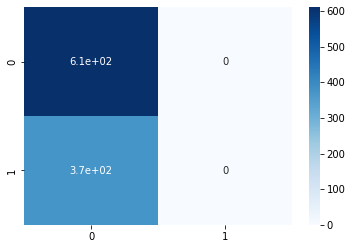

[[610   0]
 [373   0]]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       610
           1       0.00      0.00      0.00       373

    accuracy                           0.62       983
   macro avg       0.31      0.50      0.38       983
weighted avg       0.39      0.62      0.48       983

---------------------------------------------------------
Model training: KNeighborsClassifier
Evaluating the model for 
R2-square 0.6612410986775178
Mean Absolute Error:  0.3387589013224822
Mean Squared Error:  0.3387589013224822
Root Mean Squared Error:  0.5820299831816933


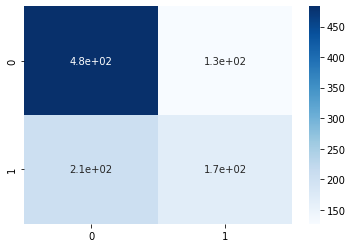

[[483 127]
 [206 167]]
              precision    recall  f1-score   support

           0       0.70      0.79      0.74       610
           1       0.57      0.45      0.50       373

    accuracy                           0.66       983
   macro avg       0.63      0.62      0.62       983
weighted avg       0.65      0.66      0.65       983

---------------------------------------------------------
Model training: GaussianNB
Evaluating the model for 
R2-square 0.6154628687690743
Mean Absolute Error:  0.38453713123092575
Mean Squared Error:  0.38453713123092575
Root Mean Squared Error:  0.6201105798411488


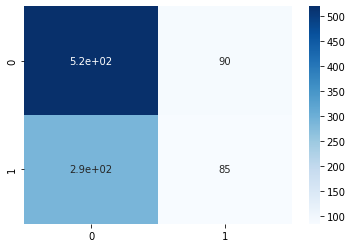

[[520  90]
 [288  85]]
              precision    recall  f1-score   support

           0       0.64      0.85      0.73       610
           1       0.49      0.23      0.31       373

    accuracy                           0.62       983
   macro avg       0.56      0.54      0.52       983
weighted avg       0.58      0.62      0.57       983

---------------------------------------------------------
Model training: DecisionTreeClassifier
Evaluating the model for 
R2-square 0.5798575788402849
Mean Absolute Error:  0.4201424211597152
Mean Squared Error:  0.4201424211597152
Root Mean Squared Error:  0.6481839408375644


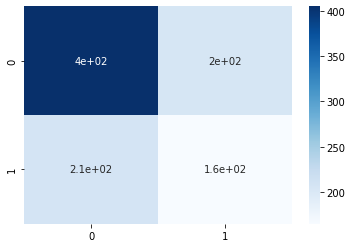

[[405 205]
 [208 165]]
              precision    recall  f1-score   support

           0       0.66      0.66      0.66       610
           1       0.45      0.44      0.44       373

    accuracy                           0.58       983
   macro avg       0.55      0.55      0.55       983
weighted avg       0.58      0.58      0.58       983

---------------------------------------------------------
Model training: SVC
Evaluating the model for 
R2-square 0.6856561546286877
Mean Absolute Error:  0.3143438453713123
Mean Squared Error:  0.3143438453713123
Root Mean Squared Error:  0.5606637542871059


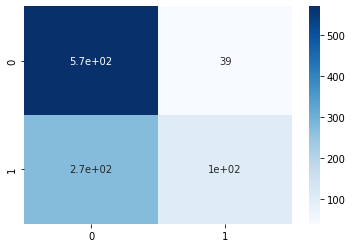

[[571  39]
 [270 103]]
              precision    recall  f1-score   support

           0       0.68      0.94      0.79       610
           1       0.73      0.28      0.40       373

    accuracy                           0.69       983
   macro avg       0.70      0.61      0.59       983
weighted avg       0.70      0.69      0.64       983

---------------------------------------------------------
Model training: Random Forest Classifier
Evaluating the model for 
R2-square 0.6826042726347915
Mean Absolute Error:  0.31739572736520855
Mean Squared Error:  0.31739572736520855
Root Mean Squared Error:  0.563378848879871


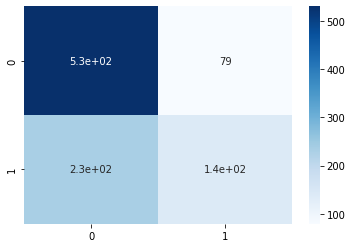

[[531  79]
 [233 140]]
              precision    recall  f1-score   support

           0       0.70      0.87      0.77       610
           1       0.64      0.38      0.47       373

    accuracy                           0.68       983
   macro avg       0.67      0.62      0.62       983
weighted avg       0.67      0.68      0.66       983

---------------------------------------------------------
Model training: xgboost classifier
[20:47:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Evaluating the model for 
R2-square 0.6612410986775178
Mean Absolute Error:  0.3387589013224822
Mean Squared Error:  0.3387589013224822
Root Mean Squared Error:  0.5820299831816933


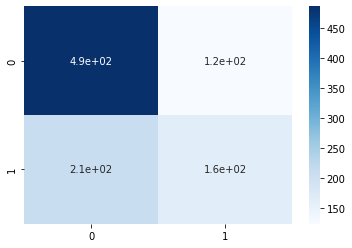

[[486 124]
 [209 164]]
              precision    recall  f1-score   support

           0       0.70      0.80      0.74       610
           1       0.57      0.44      0.50       373

    accuracy                           0.66       983
   macro avg       0.63      0.62      0.62       983
weighted avg       0.65      0.66      0.65       983

---------------------------------------------------------


In [288]:
scores=[]
for model,name in zip(model_list,model_names):
    print('Model training:',name)
    score=model_training(model,name)
    scores.append(score)
    print('---------------------------------------------------------')

In [289]:
scores_data=pd.DataFrame({'Model name':model_names,'Accuracy':scores})

In [290]:
scores_data

,Model name,Accuracy
0,LogisticRegression,0.620549
1,KNeighborsClassifier,0.661241
2,GaussianNB,0.615463
3,DecisionTreeClassifier,0.579858
4,SVC,0.685656
5,Random Forest Classifier,0.682604
6,xgboost classifier,0.661241


## Training the model using Keras(Deep learning)

In [291]:
model = Sequential()
model.add(Dense(12, input_dim=6, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [292]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [293]:
model.fit(x_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
230/230 [==============================] - 0s 512us/step - loss: 0.6736 - accuracy: 0.6044
Epoch 2/150
230/230 [==============================] - 0s 489us/step - loss: 0.6723 - accuracy: 0.6058
Epoch 3/150
230/230 [==============================] - 0s 506us/step - loss: 0.6719 - accuracy: 0.6062
Epoch 4/150
230/230 [==============================] - 0s 511us/step - loss: 0.6714 - accuracy: 0.6062
Epoch 5/150
230/230 [==============================] - 0s 495us/step - loss: 0.6711 - accuracy: 0.6058
Epoch 6/150
230/230 [==============================] - 0s 516us/step - loss: 0.6708 - accuracy: 0.6066
Epoch 7/150
230/230 [==============================] - 0s 524us/step - loss: 0.6706 - accuracy: 0.6062
Epoch 8/150
230/230 [==============================] - 0s 513us/step - loss: 0.6705 - accuracy: 0.6058
Epoch 9/150
230/230 [==============================] - 0s 517us/step - loss: 0.6702 - accuracy: 0.6066
Epoch 10/150
230/230 [==============================] - 0s 522us/step - l

230/230 [==============================] - 0s 495us/step - loss: 0.6008 - accuracy: 0.6812
Epoch 80/150
230/230 [==============================] - 0s 469us/step - loss: 0.6008 - accuracy: 0.6834
Epoch 81/150
230/230 [==============================] - 0s 476us/step - loss: 0.6014 - accuracy: 0.6869
Epoch 82/150
230/230 [==============================] - 0s 489us/step - loss: 0.5992 - accuracy: 0.6773
Epoch 83/150
230/230 [==============================] - 0s 472us/step - loss: 0.5983 - accuracy: 0.6790
Epoch 84/150
230/230 [==============================] - 0s 478us/step - loss: 0.5966 - accuracy: 0.6829
Epoch 85/150
230/230 [==============================] - 0s 494us/step - loss: 0.5992 - accuracy: 0.6816
Epoch 86/150
230/230 [==============================] - 0s 508us/step - loss: 0.5972 - accuracy: 0.6803
Epoch 87/150
230/230 [==============================] - 0s 487us/step - loss: 0.5975 - accuracy: 0.6773
Epoch 88/150
230/230 [==============================] - 0s 479us/step - loss:

In [294]:
predictions = model.predict(x_test)
predictions = (predictions > 0.5)

In [295]:
predictions

array([[ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [296]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test, y_pred)
print(con_mat)

[[535  75]
 [245 128]]


In [297]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.67      0.94      0.78       610
           1       0.69      0.24      0.35       373

    accuracy                           0.67       983
   macro avg       0.68      0.59      0.57       983
weighted avg       0.68      0.67      0.62       983



**The accuracy for every model lies between 60 to 69.**

## Hyperparameter tuning for RandomForestClassifier

In [298]:
rf_model=RandomForestClassifier()

In [299]:
n_estimators=[int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree

In [300]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(param_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [301]:
from sklearn.model_selection import RandomizedSearchCV
#initialzing the RandomSearchCV model
random_cv=RandomizedSearchCV(estimator=rf_model,param_distributions=param_grid,scoring='neg_mean_squared_error',n_iter=100,cv=5,verbose=10)

In [302]:
random_cv.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=5, score=-0.357, total=   1.0s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=5, score=-0.351, total=   1.1s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=5 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=5, score=-0.355, total=   0.9s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=5 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.9s remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=5, score=-0.343, total=   0.9s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=5 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.8s remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=5, score=-0.365, total=   0.9s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=30 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.7s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=30, score=-0.346, total=   2.8s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=30 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    7.5s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=30, score=-0.333, total=   3.6s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=30 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   11.1s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=30, score=-0.331, total=   3.3s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=30 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   14.4s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=30, score=-0.356, total=   3.0s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=30 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   17.4s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=30, score=-0.332, total=   2.8s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=10, score=-0.362, total=   0.9s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=10, score=-0.357, total=   0.9s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=10, score=-0.346, total=   0.9s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt

[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=5, score=-0.355, total=   0.7s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=5, score=-0.357, total=   0.7s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=5, score=-0.349, total=   0.7s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=5, score=-0.365, total=   0.7s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=5, score=-0.357, t

[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25, score=-0.345, total=   1.9s
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25 
[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25, score=-0.341, total=   1.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, score=-0.331, total=   2.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, score=-0.325, total=   2.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, score=-0.3

[CV]  n_estimators=200, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=20, score=-0.351, total=   0.5s
[CV] n_estimators=200, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=20 
[CV]  n_estimators=200, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=20, score=-0.349, total=   0.5s
[CV] n_estimators=200, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=20 
[CV]  n_estimators=200, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=20, score=-0.355, total=   0.5s
[CV] n_estimators=200, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=20 
[CV]  n_estimators=200, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=20, score=-0.360, total=   0.5s
[CV] n_estimators=200, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=20 
[CV]  n_estimators=200, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_de

[CV]  n_estimators=500, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=15, score=-0.349, total=   1.2s
[CV] n_estimators=500, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=15 
[CV]  n_estimators=500, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=15, score=-0.358, total=   1.3s
[CV] n_estimators=500, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=15 
[CV]  n_estimators=500, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=15, score=-0.373, total=   1.2s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=5, score=-0.355, total=   0.5s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_dept

[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=15, score=-0.341, total=   3.3s
[CV] n_estimators=1100, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=20, score=-0.351, total=   2.7s
[CV] n_estimators=1100, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=20, score=-0.327, total=   2.7s
[CV] n_estimators=1100, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=20, score=-0.327, total=   2.7s
[CV] n_estimators=1100, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_dep

[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, score=-0.336, total=   1.2s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, score=-0.349, total=   1.2s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, score=-0.328, total=   1.2s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, score=-0.338, total=   1.2s
[CV] n_estimators=600, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=600, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=10, score=

[CV]  n_estimators=800, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=15, score=-0.362, total=   1.8s
[CV] n_estimators=800, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=15 
[CV]  n_estimators=800, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=15, score=-0.365, total=   1.8s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=5, score=-0.346, total=   1.3s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=5, score=-0.351, total=   1.3s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=5, scor

[CV]  n_estimators=800, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=30, score=-0.351, total=   2.1s
[CV] n_estimators=800, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=800, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=30, score=-0.333, total=   2.1s
[CV] n_estimators=800, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=800, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=30, score=-0.318, total=   2.1s
[CV] n_estimators=800, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=800, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=30, score=-0.347, total=   2.1s
[CV] n_estimators=800, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=800, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=30, s

[CV]  n_estimators=500, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=10, score=-0.340, total=   1.1s
[CV] n_estimators=500, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=10 
[CV]  n_estimators=500, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=10, score=-0.354, total=   1.1s
[CV] n_estimators=500, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=10 
[CV]  n_estimators=500, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=10, score=-0.345, total=   1.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=10, score=-0.329, total=   1.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=

[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=30, score=-0.334, total=   1.4s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5, score=-0.353, total=   1.4s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5, score=-0.353, total=   1.4s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5, score=-0.355, total=   1.4s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5, score=-0.349, tot

[CV]  n_estimators=600, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=5, score=-0.375, total=   1.0s
[CV] n_estimators=600, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=600, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=5, score=-0.366, total=   1.0s
[CV] n_estimators=600, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=600, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=5, score=-0.352, total=   1.0s
[CV] n_estimators=600, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=600, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=5, score=-0.384, total=   1.0s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, s

[CV]  n_estimators=1100, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=10, score=-0.365, total=   2.4s
[CV] n_estimators=1100, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1100, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=10, score=-0.373, total=   2.4s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=10, score=-0.355, total=   0.6s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=10, score=-0.351, total=   0.6s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=10, max_features=

[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=20, score=-0.351, total=   0.7s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=20, score=-0.318, total=   0.8s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=20, score=-0.325, total=   0.7s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=20, score=-0.362, total=   0.7s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=20, s

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 12.9min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=10)

In [309]:
#getting best parameters
random_cv.best_params_

{'n_estimators': 900,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10}

In [304]:
#training the model with new best parameters
new_rf_model=RandomForestClassifier(n_estimators=900,min_samples_split=2,max_features='sqrt',max_depth=25)

In [305]:
#fitting the new model
new_rf_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=25, max_features='sqrt', n_estimators=900)

In [311]:
#accuracy of new model is better than the initial random forest classifier model which go trained
new_rf_model.score(x_test,y_test)

0.6836215666327569

In [357]:
new_rf_predicted_values=new_rf_model.predict(x_test)

In [359]:
def reports(y_test,predicted_values):
    print(metrics.confusion_matrix(y_test,predicted_values))
    print(metrics.classification_report(y_test,predicted_values))

In [360]:
reports(y_test,new_rf_predicted_values)

[[531  79]
 [232 141]]
              precision    recall  f1-score   support

           0       0.70      0.87      0.77       610
           1       0.64      0.38      0.48       373

    accuracy                           0.68       983
   macro avg       0.67      0.62      0.62       983
weighted avg       0.68      0.68      0.66       983

[CV] C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=15 ...........
[CV]  C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=15, score=-0.489, total=   0.0s
[CV] C=1.0, degree=20, gamma=scale, kernel=rbf, max_iter=10 ..........
[CV]  C=1.0, degree=20, gamma=scale, kernel=rbf, max_iter=10, score=-0.466, total=   0.0s
[CV] C=1.0, degree=20, gamma=scale, kernel=rbf, max_iter=15 ..........
[CV]  C=1.0, degree=20, gamma=scale, kernel=rbf, max_iter=15, score=-0.466, total=   0.0s
[CV] C=1.0, degree=20, gamma=scale, kernel=sigmoid, max_iter=10 ......
[CV]  C=1.0, degree=20, gamma=scale, kernel=sigmoid, max_iter=10, score=-0.378, total=   0.0s
[CV

[CV] C=1.0, degree=3, gamma=scale, kernel=ploy, max_iter=10 ..........
[CV]  C=1.0, degree=3, gamma=scale, kernel=ploy, max_iter=10, score=nan, total=   0.0s
[CV] C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=15 ........
[CV]  C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=15, score=-0.505, total=   0.0s
[CV] C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=10 ...........
[CV]  C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=10, score=-0.427, total=   0.0s
[CV] C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=10 ...........
[CV]  C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=10, score=-0.511, total=   0.0s
[CV] C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=10 .......
[CV]  C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=10, score=-0.378, total=   0.0s
[CV] C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=15 .......
[CV]  C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=15, score=-0.372, total=   0.0s
[CV] C=1.0, degree=6, gamma=aut

[CV] C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=10 ...........
[CV]  C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=10, score=-0.511, total=   0.1s
[CV] C=1.0, degree=6, gamma=auto, kernel=linear, max_iter=10 .........
[CV]  C=1.0, degree=6, gamma=auto, kernel=linear, max_iter=10, score=-0.537, total=   0.0s
[CV] C=1.0, degree=6, gamma=auto, kernel=linear, max_iter=15 .........
[CV]  C=1.0, degree=6, gamma=auto, kernel=linear, max_iter=15, score=-0.460, total=   0.0s
[CV] C=1.0, degree=6, gamma=auto, kernel=ploy, max_iter=15 ...........
[CV]  C=1.0, degree=6, gamma=auto, kernel=ploy, max_iter=15, score=nan, total=   0.0s
[CV] C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=10 ............
[CV]  C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=10, score=-0.563, total=   0.0s
[CV] C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=15 ............
[CV]  C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=15, score=-0.607, total=   0.0s
[CV] C=1.0, degree=6, gamma=auto, kernel=

[CV] C=1.0, degree=3, gamma=scale, kernel=linear, max_iter=10 ........
[CV]  C=1.0, degree=3, gamma=scale, kernel=linear, max_iter=10, score=-0.560, total=   0.0s
[CV] C=1.0, degree=3, gamma=auto, kernel=linear, max_iter=10 .........
[CV]  C=1.0, degree=3, gamma=auto, kernel=linear, max_iter=10, score=-0.543, total=   0.1s
[CV] C=1.0, degree=3, gamma=auto, kernel=linear, max_iter=15 .........
[CV]  C=1.0, degree=3, gamma=auto, kernel=linear, max_iter=15, score=-0.543, total=   0.0s
[CV] C=1.0, degree=3, gamma=auto, kernel=ploy, max_iter=10 ...........
[CV]  C=1.0, degree=3, gamma=auto, kernel=ploy, max_iter=10, score=nan, total=   0.0s
[CV] C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=10 ............
[CV]  C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=10, score=-0.613, total=   0.0s
[CV] C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=10 ............
[CV]  C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=10, score=-0.566, total=   0.0s
[CV] C=1.0, degree=3, gamma=auto, kern

[CV] C=1.0, degree=3, gamma=scale, kernel=linear, max_iter=15 ........
[CV]  C=1.0, degree=3, gamma=scale, kernel=linear, max_iter=15, score=-0.480, total=   0.1s
[CV] C=1.0, degree=3, gamma=auto, kernel=linear, max_iter=15 .........
[CV]  C=1.0, degree=3, gamma=auto, kernel=linear, max_iter=15, score=-0.477, total=   0.0s
[CV] C=1.0, degree=6, gamma=scale, kernel=linear, max_iter=10 ........
[CV]  C=1.0, degree=6, gamma=scale, kernel=linear, max_iter=10, score=-0.560, total=   0.0s
[CV] C=1.0, degree=6, gamma=scale, kernel=linear, max_iter=15 ........
[CV]  C=1.0, degree=6, gamma=scale, kernel=linear, max_iter=15, score=-0.480, total=   0.0s
[CV] C=1.0, degree=6, gamma=scale, kernel=ploy, max_iter=10 ..........
[CV]  C=1.0, degree=6, gamma=scale, kernel=ploy, max_iter=10, score=nan, total=   0.0s
[CV] C=1.0, degree=6, gamma=scale, kernel=ploy, max_iter=10 ..........
[CV]  C=1.0, degree=6, gamma=scale, kernel=ploy, max_iter=10, score=nan, total=   0.0s
[CV] C=1.0, degree=10, gamma=auto

[CV] C=1.0, degree=3, gamma=scale, kernel=ploy, max_iter=15 ..........
[CV]  C=1.0, degree=3, gamma=scale, kernel=ploy, max_iter=15, score=nan, total=   0.0s
[CV] C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=10 ........
[CV]  C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=10, score=-0.573, total=   0.0s
[CV] C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=15 ........
[CV]  C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=15, score=-0.549, total=   0.0s
[CV] C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=15 ........
[CV]  C=1.0, degree=6, gamma=auto, kernel=sigmoid, max_iter=15, score=-0.541, total=   0.0s
[CV] C=1.0, degree=10, gamma=scale, kernel=linear, max_iter=10 .......
[CV]  C=1.0, degree=10, gamma=scale, kernel=linear, max_iter=10, score=-0.537, total=   0.0s
[CV] C=1.0, degree=10, gamma=scale, kernel=linear, max_iter=10 .......
[CV]  C=1.0, degree=10, gamma=scale, kernel=linear, max_iter=10, score=-0.554, total=   0.0s
[CV] C=1.0, degree=10, ga

[CV] C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=15 ...........
[CV]  C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=15, score=-0.434, total=   0.0s
[CV] C=1.0, degree=20, gamma=scale, kernel=linear, max_iter=15 .......
[CV]  C=1.0, degree=20, gamma=scale, kernel=linear, max_iter=15, score=-0.477, total=   0.0s
[CV] C=1.0, degree=20, gamma=scale, kernel=ploy, max_iter=15 .........
[CV]  C=1.0, degree=20, gamma=scale, kernel=ploy, max_iter=15, score=nan, total=   0.0s
[CV] C=1.0, degree=20, gamma=scale, kernel=rbf, max_iter=10 ..........
[CV]  C=1.0, degree=20, gamma=scale, kernel=rbf, max_iter=10, score=-0.546, total=   0.0s
[CV] C=1.0, degree=20, gamma=scale, kernel=rbf, max_iter=10 ..........
[CV]  C=1.0, degree=20, gamma=scale, kernel=rbf, max_iter=10, score=-0.511, total=   0.0s
[CV] C=1.0, degree=20, gamma=scale, kernel=rbf, max_iter=15 ..........
[CV]  C=1.0, degree=20, gamma=scale, kernel=rbf, max_iter=15, score=-0.509, total=   0.0s
[CV] C=1.0, degree=20, gamma=scale

[CV] C=1.0, degree=3, gamma=scale, kernel=linear, max_iter=10 ........
[CV]  C=1.0, degree=3, gamma=scale, kernel=linear, max_iter=10, score=-0.607, total=   0.0s
[CV] C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=10 ............
[CV]  C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=10, score=-0.584, total=   0.0s
[CV] C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=15 ............
[CV]  C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=15, score=-0.535, total=   0.0s
[CV] C=1.0, degree=15, gamma=auto, kernel=ploy, max_iter=10 ..........
[CV]  C=1.0, degree=15, gamma=auto, kernel=ploy, max_iter=10, score=nan, total=   0.0s
[CV] C=1.0, degree=15, gamma=auto, kernel=ploy, max_iter=10 ..........
[CV]  C=1.0, degree=15, gamma=auto, kernel=ploy, max_iter=10, score=nan, total=   0.0s
[CV] C=1.0, degree=15, gamma=auto, kernel=ploy, max_iter=15 ..........
[CV]  C=1.0, degree=15, gamma=auto, kernel=ploy, max_iter=15, score=nan, total=   0.0s
[CV] C=1.0, degree=15, gamma=auto, kernel=plo

[CV] C=1.0, degree=3, gamma=scale, kernel=ploy, max_iter=10 ..........
[CV]  C=1.0, degree=3, gamma=scale, kernel=ploy, max_iter=10, score=nan, total=   0.0s
[CV] C=1.0, degree=3, gamma=auto, kernel=linear, max_iter=15 .........
[CV]  C=1.0, degree=3, gamma=auto, kernel=linear, max_iter=15, score=-0.627, total=   0.0s
[CV] C=1.0, degree=3, gamma=auto, kernel=ploy, max_iter=10 ...........
[CV]  C=1.0, degree=3, gamma=auto, kernel=ploy, max_iter=10, score=nan, total=   0.0s
[CV] C=1.0, degree=6, gamma=scale, kernel=linear, max_iter=15 ........
[CV]  C=1.0, degree=6, gamma=scale, kernel=linear, max_iter=15, score=-0.622, total=   0.0s
[CV] C=1.0, degree=6, gamma=scale, kernel=linear, max_iter=15 ........
[CV]  C=1.0, degree=6, gamma=scale, kernel=linear, max_iter=15, score=-0.477, total=   0.0s
[CV] C=1.0, degree=6, gamma=scale, kernel=ploy, max_iter=10 ..........
[CV]  C=1.0, degree=6, gamma=scale, kernel=ploy, max_iter=10, score=nan, total=   0.0s
[CV] C=1.0, degree=6, gamma=scale, kern

[CV] C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=10 .......
[CV]  C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=10, score=-0.422, total=   0.0s
[CV] C=1.0, degree=20, gamma=scale, kernel=ploy, max_iter=10 .........
[CV]  C=1.0, degree=20, gamma=scale, kernel=ploy, max_iter=10, score=nan, total=   0.0s
[CV] C=1.0, degree=20, gamma=scale, kernel=ploy, max_iter=10 .........
[CV]  C=1.0, degree=20, gamma=scale, kernel=ploy, max_iter=10, score=nan, total=   0.0s
[CV] C=2.3, degree=3, gamma=scale, kernel=rbf, max_iter=15 ...........
[CV]  C=2.3, degree=3, gamma=scale, kernel=rbf, max_iter=15, score=-0.521, total=   0.0s
[CV] C=2.3, degree=3, gamma=scale, kernel=rbf, max_iter=15 ...........
[CV]  C=2.3, degree=3, gamma=scale, kernel=rbf, max_iter=15, score=-0.502, total=   0.0s
[CV] C=2.3, degree=3, gamma=scale, kernel=sigmoid, max_iter=10 .......
[CV]  C=2.3, degree=3, gamma=scale, kernel=sigmoid, max_iter=10, score=-0.384, total=   0.0s
[CV] C=2.3, degree=3, gamma=scale,

[CV] C=1.0, degree=3, gamma=scale, kernel=ploy, max_iter=10 ..........
[CV]  C=1.0, degree=3, gamma=scale, kernel=ploy, max_iter=10, score=nan, total=   0.0s
[CV] C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=10 ............
[CV]  C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=10, score=-0.604, total=   0.0s
[CV] C=1.0, degree=6, gamma=scale, kernel=linear, max_iter=10 ........
[CV]  C=1.0, degree=6, gamma=scale, kernel=linear, max_iter=10, score=-0.537, total=   0.0s
[CV] C=1.0, degree=6, gamma=scale, kernel=linear, max_iter=15 ........
[CV]  C=1.0, degree=6, gamma=scale, kernel=linear, max_iter=15, score=-0.460, total=   0.0s
[CV] C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=15 .......
[CV]  C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=15, score=-0.378, total=   0.0s
[CV] C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=15 .......
[CV]  C=1.0, degree=6, gamma=scale, kernel=sigmoid, max_iter=15, score=-0.416, total=   0.0s
[CV] C=1.0, degree=10, gamma=

[CV] C=1.0, degree=3, gamma=scale, kernel=ploy, max_iter=15 ..........
[CV]  C=1.0, degree=3, gamma=scale, kernel=ploy, max_iter=15, score=nan, total=   0.0s
[CV] C=1.0, degree=3, gamma=auto, kernel=ploy, max_iter=15 ...........
[CV]  C=1.0, degree=3, gamma=auto, kernel=ploy, max_iter=15, score=nan, total=   0.0s
[CV] C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=10 ............
[CV]  C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=10, score=-0.591, total=   0.0s
[CV] C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=15 ...........
[CV]  C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=15, score=-0.489, total=   0.0s
[CV] C=1.0, degree=10, gamma=scale, kernel=linear, max_iter=15 .......
[CV]  C=1.0, degree=10, gamma=scale, kernel=linear, max_iter=15, score=-0.627, total=   0.0s
[CV] C=1.0, degree=10, gamma=scale, kernel=ploy, max_iter=10 .........
[CV]  C=1.0, degree=10, gamma=scale, kernel=ploy, max_iter=10, score=nan, total=   0.0s
[CV] C=1.0, degree=10, gamma=scale, kernel=

[CV] C=1.0, degree=3, gamma=scale, kernel=ploy, max_iter=10 ..........
[CV]  C=1.0, degree=3, gamma=scale, kernel=ploy, max_iter=10, score=nan, total=   0.0s
[CV] C=1.0, degree=10, gamma=scale, kernel=linear, max_iter=10 .......
[CV]  C=1.0, degree=10, gamma=scale, kernel=linear, max_iter=10, score=-0.543, total=   0.0s
[CV] C=1.0, degree=10, gamma=scale, kernel=linear, max_iter=15 .......
[CV]  C=1.0, degree=10, gamma=scale, kernel=linear, max_iter=15, score=-0.460, total=   0.0s
[CV] C=1.0, degree=10, gamma=scale, kernel=linear, max_iter=15 .......
[CV]  C=1.0, degree=10, gamma=scale, kernel=linear, max_iter=15, score=-0.480, total=   0.0s
[CV] C=1.0, degree=10, gamma=scale, kernel=rbf, max_iter=10 ..........
[CV]  C=1.0, degree=10, gamma=scale, kernel=rbf, max_iter=10, score=-0.546, total=   0.0s
[CV] C=1.0, degree=10, gamma=scale, kernel=rbf, max_iter=10 ..........
[CV]  C=1.0, degree=10, gamma=scale, kernel=rbf, max_iter=10, score=-0.517, total=   0.0s
[CV] C=1.0, degree=10, gamma

[CV] C=1.0, degree=3, gamma=scale, kernel=ploy, max_iter=15 ..........
[CV]  C=1.0, degree=3, gamma=scale, kernel=ploy, max_iter=15, score=nan, total=   0.0s
[CV] C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=15 ............
[CV]  C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=15, score=-0.624, total=   0.0s
[CV] C=1.0, degree=10, gamma=auto, kernel=rbf, max_iter=10 ...........
[CV]  C=1.0, degree=10, gamma=auto, kernel=rbf, max_iter=10, score=-0.604, total=   0.0s
[CV] C=1.0, degree=10, gamma=auto, kernel=rbf, max_iter=15 ...........
[CV]  C=1.0, degree=10, gamma=auto, kernel=rbf, max_iter=15, score=-0.604, total=   0.0s
[CV] C=1.0, degree=10, gamma=auto, kernel=sigmoid, max_iter=15 .......
[CV]  C=1.0, degree=10, gamma=auto, kernel=sigmoid, max_iter=15, score=-0.505, total=   0.0s
[CV] C=1.0, degree=15, gamma=scale, kernel=rbf, max_iter=10 ..........
[CV]  C=1.0, degree=15, gamma=scale, kernel=rbf, max_iter=10, score=-0.466, total=   0.0s
[CV] C=1.0, degree=15, gamma=scale, ke

[CV] C=1.0, degree=3, gamma=scale, kernel=linear, max_iter=15 ........
[CV]  C=1.0, degree=3, gamma=scale, kernel=linear, max_iter=15, score=-0.598, total=   0.0s
[CV] C=1.0, degree=10, gamma=scale, kernel=ploy, max_iter=10 .........
[CV]  C=1.0, degree=10, gamma=scale, kernel=ploy, max_iter=10, score=nan, total=   0.0s
[CV] C=1.0, degree=10, gamma=scale, kernel=rbf, max_iter=10 ..........
[CV]  C=1.0, degree=10, gamma=scale, kernel=rbf, max_iter=10, score=-0.427, total=   0.0s
[CV] C=1.0, degree=10, gamma=scale, kernel=rbf, max_iter=10 ..........
[CV]  C=1.0, degree=10, gamma=scale, kernel=rbf, max_iter=10, score=-0.462, total=   0.0s
[CV] C=1.0, degree=10, gamma=scale, kernel=rbf, max_iter=15 ..........
[CV]  C=1.0, degree=10, gamma=scale, kernel=rbf, max_iter=15, score=-0.482, total=   0.0s
[CV] C=1.0, degree=10, gamma=scale, kernel=rbf, max_iter=15 ..........
[CV]  C=1.0, degree=10, gamma=scale, kernel=rbf, max_iter=15, score=-0.489, total=   0.0s
[CV] C=1.0, degree=10, gamma=scale

[CV] C=1.0, degree=3, gamma=scale, kernel=ploy, max_iter=15 ..........
[CV]  C=1.0, degree=3, gamma=scale, kernel=ploy, max_iter=15, score=nan, total=   0.0s
[CV] C=1.0, degree=3, gamma=auto, kernel=linear, max_iter=15 .........
[CV]  C=1.0, degree=3, gamma=auto, kernel=linear, max_iter=15, score=-0.622, total=   0.0s
[CV] C=1.0, degree=3, gamma=auto, kernel=ploy, max_iter=15 ...........
[CV]  C=1.0, degree=3, gamma=auto, kernel=ploy, max_iter=15, score=nan, total=   0.0s
[CV] C=1.0, degree=3, gamma=auto, kernel=ploy, max_iter=15 ...........
[CV]  C=1.0, degree=3, gamma=auto, kernel=ploy, max_iter=15, score=nan, total=   0.0s
[CV] C=1.0, degree=10, gamma=scale, kernel=ploy, max_iter=15 .........
[CV]  C=1.0, degree=10, gamma=scale, kernel=ploy, max_iter=15, score=nan, total=   0.0s
[CV] C=1.0, degree=10, gamma=scale, kernel=rbf, max_iter=10 ..........
[CV]  C=1.0, degree=10, gamma=scale, kernel=rbf, max_iter=10, score=-0.511, total=   0.0s
[CV] C=1.0, degree=10, gamma=scale, kernel=rbf

[CV] C=1.0, degree=3, gamma=scale, kernel=ploy, max_iter=10 ..........
[CV]  C=1.0, degree=3, gamma=scale, kernel=ploy, max_iter=10, score=nan, total=   0.0s
[CV] C=1.0, degree=3, gamma=auto, kernel=linear, max_iter=15 .........
[CV]  C=1.0, degree=3, gamma=auto, kernel=linear, max_iter=15, score=-0.480, total=   0.0s
[CV] C=1.0, degree=3, gamma=auto, kernel=ploy, max_iter=15 ...........
[CV]  C=1.0, degree=3, gamma=auto, kernel=ploy, max_iter=15, score=nan, total=   0.0s
[CV] C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=10 ...........
[CV]  C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=10, score=-0.460, total=   0.0s
[CV] C=1.0, degree=6, gamma=auto, kernel=linear, max_iter=15 .........
[CV]  C=1.0, degree=6, gamma=auto, kernel=linear, max_iter=15, score=-0.598, total=   0.0s
[CV] C=1.0, degree=6, gamma=auto, kernel=linear, max_iter=15 .........
[CV]  C=1.0, degree=6, gamma=auto, kernel=linear, max_iter=15, score=-0.477, total=   0.0s
[CV] C=1.0, degree=6, gamma=auto, kerne

[CV] C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=15 ...........
[CV]  C=1.0, degree=3, gamma=scale, kernel=rbf, max_iter=15, score=-0.439, total=   0.1s
[CV] C=1.0, degree=10, gamma=auto, kernel=linear, max_iter=15 ........
[CV]  C=1.0, degree=10, gamma=auto, kernel=linear, max_iter=15, score=-0.622, total=   0.0s
[CV] C=1.0, degree=10, gamma=auto, kernel=ploy, max_iter=10 ..........
[CV]  C=1.0, degree=10, gamma=auto, kernel=ploy, max_iter=10, score=nan, total=   0.0s
[CV] C=1.0, degree=10, gamma=auto, kernel=ploy, max_iter=15 ..........
[CV]  C=1.0, degree=10, gamma=auto, kernel=ploy, max_iter=15, score=nan, total=   0.0s
[CV] C=1.0, degree=10, gamma=auto, kernel=rbf, max_iter=10 ...........
[CV]  C=1.0, degree=10, gamma=auto, kernel=rbf, max_iter=10, score=-0.566, total=   0.0s
[CV] C=1.0, degree=10, gamma=auto, kernel=rbf, max_iter=15 ...........
[CV]  C=1.0, degree=10, gamma=auto, kernel=rbf, max_iter=15, score=-0.610, total=   0.0s
[CV] C=1.0, degree=10, gamma=auto, kernel

[CV] C=1.0, degree=3, gamma=scale, kernel=linear, max_iter=10 ........
[CV]  C=1.0, degree=3, gamma=scale, kernel=linear, max_iter=10, score=-0.445, total=   0.1s
[CV] C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=15 .......
[CV]  C=1.0, degree=3, gamma=scale, kernel=sigmoid, max_iter=15, score=-0.413, total=   0.0s
[CV] C=1.0, degree=3, gamma=auto, kernel=linear, max_iter=10 .........
[CV]  C=1.0, degree=3, gamma=auto, kernel=linear, max_iter=10, score=-0.537, total=   0.0s
[CV] C=1.0, degree=3, gamma=auto, kernel=ploy, max_iter=10 ...........
[CV]  C=1.0, degree=3, gamma=auto, kernel=ploy, max_iter=10, score=nan, total=   0.0s
[CV] C=1.0, degree=3, gamma=auto, kernel=ploy, max_iter=15 ...........
[CV]  C=1.0, degree=3, gamma=auto, kernel=ploy, max_iter=15, score=nan, total=   0.0s
[CV] C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=10 ........
[CV]  C=1.0, degree=3, gamma=auto, kernel=sigmoid, max_iter=10, score=-0.456, total=   0.0s
[CV] C=1.0, degree=3, gamma=auto, 

[CV] C=1.0, degree=3, gamma=scale, kernel=ploy, max_iter=15 ..........
[CV]  C=1.0, degree=3, gamma=scale, kernel=ploy, max_iter=15, score=nan, total=   0.0s
[CV] C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=10 ............
[CV]  C=1.0, degree=3, gamma=auto, kernel=rbf, max_iter=10, score=-0.485, total=   0.0s
[CV] C=1.0, degree=6, gamma=auto, kernel=ploy, max_iter=15 ...........
[CV]  C=1.0, degree=6, gamma=auto, kernel=ploy, max_iter=15, score=nan, total=   0.0s
[CV] C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=10 ............
[CV]  C=1.0, degree=6, gamma=auto, kernel=rbf, max_iter=10, score=-0.604, total=   0.0s
[CV] C=1.0, degree=10, gamma=scale, kernel=rbf, max_iter=15 ..........
[CV]  C=1.0, degree=10, gamma=scale, kernel=rbf, max_iter=15, score=-0.509, total=   0.0s
[CV] C=1.0, degree=10, gamma=scale, kernel=rbf, max_iter=15 ..........
[CV]  C=1.0, degree=10, gamma=scale, kernel=rbf, max_iter=15, score=-0.502, total=   0.0s
[CV] C=1.0, degree=10, gamma=scale, kernel=si

[CV] C=1.0, degree=3, gamma=scale, kernel=linear, max_iter=10 ........
[CV]  C=1.0, degree=3, gamma=scale, kernel=linear, max_iter=10, score=-0.523, total=   0.0s
[CV] C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=15 ...........
[CV]  C=1.0, degree=6, gamma=scale, kernel=rbf, max_iter=15, score=-0.466, total=   0.0s
[CV] C=1.0, degree=15, gamma=scale, kernel=rbf, max_iter=10 ..........
[CV]  C=1.0, degree=15, gamma=scale, kernel=rbf, max_iter=10, score=-0.511, total=   0.0s
[CV] C=1.0, degree=15, gamma=scale, kernel=rbf, max_iter=15 ..........
[CV]  C=1.0, degree=15, gamma=scale, kernel=rbf, max_iter=15, score=-0.434, total=   0.0s
[CV] C=1.0, degree=15, gamma=scale, kernel=sigmoid, max_iter=10 ......
[CV]  C=1.0, degree=15, gamma=scale, kernel=sigmoid, max_iter=10, score=-0.413, total=   0.0s
[CV] C=2.3, degree=3, gamma=scale, kernel=linear, max_iter=10 ........
[CV]  C=2.3, degree=3, gamma=scale, kernel=linear, max_iter=10, score=-0.473, total=   0.0s
[CV] C=2.3, degree=10, gamm

In [308]:
with open('water_quality_prediction_tuned_rf_model.pkl','wb') as file:
    pickle.dump(new_rf_model,file)

## Hyperparameter tuning for SVM.SVC(support vectors)

In [347]:
initial_svc_model=SVC()

In [348]:
c=[1.0,1.5,2.3,3.6]
kernel=['linear','ploy','rbf','sigmoid']
degree=[3,6,10,15,20]
gamma=['scale', 'auto']
max_iter=[10,15]

In [349]:
param_grid={'C':c,
           'kernel':kernel,
           'degree':degree,
           'gamma':gamma,
           'max_iter':max_iter}

In [350]:
from sklearn.model_selection import GridSearchCV

In [351]:
grid_svc_model=GridSearchCV(estimator=initial_svc_model,param_grid=param_grid,scoring='neg_mean_squared_error',n_jobs=50,cv=7,verbose=10)

In [352]:
grid_svc_model.fit(x_train,y_train)

Fitting 7 folds for each of 320 candidates, totalling 2240 fits


[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3

  warnings.warn("Estimator fit failed. The score on this train-test"
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn/svm/_libsvm.pyx", line 175, in sklearn.svm._libs

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/Library/Frame

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn/svm/_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'ploy' is not in list

  warnings.warn("Estimator 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: 

ValueError: 'ploy' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn/svm/_libsvm.p

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: 

ValueError: 'ploy' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn/svm/_libsvm.p

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: 

ValueError: 'ploy' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn/svm/_libsvm.p

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: 

  warnings.warn("Estimator fit failed. The score on this train-test"
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn/svm/_libsvm.pyx", line 175, in sklearn.svm._libs

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
[Parallel(n_jobs=50)]: Done 1305 tasks      | elapsed:    9.1s
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/Library/Frame

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
[Parallel(n_jobs=50)]: Done 1582 tasks      | elapsed:    9.7s
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: 

GridSearchCV(cv=7, estimator=SVC(), n_jobs=50,
             param_grid={'C': [1.0, 1.5, 2.3, 3.6],
                         'degree': [3, 6, 10, 15, 20],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'ploy', 'rbf', 'sigmoid'],
                         'max_iter': [10, 15]},
             scoring='neg_mean_squared_error', verbose=10)

In [354]:
grid_svc_model.best_params_

{'C': 1.0, 'degree': 3, 'gamma': 'scale', 'kernel': 'sigmoid', 'max_iter': 10}

In [355]:
grid_svc_model.best_score_

-0.3960124774904368

In [362]:
#training SVC with new parameters
new_svc_model=SVC(C=1.0,degree=3,gamma='scale',kernel='sigmoid',max_iter=10)

In [363]:
new_svc_model.fit(x_train,y_train)

SVC(kernel='sigmoid', max_iter=10)

In [364]:
new_svc_model.score(x_test,y_test)

0.6164801627670397

In [365]:
#new SVC model isn't working well. 

**We can proceed with new Random Forest model or initially trained SVC model**